# # PROJECT 5: HOUSES PRICES PREDICTION IN BCN MACHINE LEARNING MODEL

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv(r'C:\Users\Migue Granica\Desktop\IronHack\Module_3\PROJECT_5\csv\house_prices_hab.csv')
#df = pd.read_csv(r'C:\Users\Migue Granica\Desktop\IronHack\Modulo_3\PROJECT_5\csv\house_prices_clean.csv')

In [25]:
df.head()

,Unnamed: 0,Unnamed: 0.1,district,room_n,bath_n,sqm_constr,price,sqm_price
0,1,1,Sarria-Sant_Gervasi,4.0,2.0,185.0,1350000.0,5362
1,2,2,Eixample,2.0,2.0,86.0,645000.0,4632
2,3,3,Eixample,3.0,1.0,70.0,399000.0,4632
3,4,4,Eixample,4.0,2.0,100.0,398000.0,4632
4,5,5,Sarria-Sant_Gervasi,3.0,2.0,140.0,690000.0,5362


In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'district', 'room_n', 'bath_n',
       'sqm_constr', 'price', 'sqm_price'],
      dtype='object')

## Recording the SQM mean price

    the publics registres can show us the mean square meter price for each district in termes of the all polutation, this values can be use to elavorate a more precise predictor scalable in more a versatile way. Let's use the last semestre registre's.

In [4]:
df_val  = pd.read_excel(r'C:\Users\Migue Granica\Desktop\IronHack\Module_3\PROJECT_5\xls\m2_x_año_3.xlsx')

In [5]:
df.district.unique()

array(['Sarria-Sant_Gervasi', 'Eixample', 'Gràcia', 'Sant Andreu',
       'Ciutat Vella', 'Les Corts', 'Horta Guinardó', 'Sants Montjuic',
       'Sant Marti', 'Nou Barris'], dtype=object)

In [6]:
df_val.loc[df_val['año']==2019][['distrito','valor_m2']]

,distrito,valor_m2
121,BARCELONA,4115
122,1. Ciutat Vella,4320
123,2. Eixample,4632
124,3. Sants-Montjuïc,3539
125,4. Les Corts,4763
126,5. Sarrià-Sant Gervasi,5362
127,6. Gràcia,4217
128,7. Horta-Guinardó,3080
129,8. Nou Barris,2591
130,9. Sant Andreu,3261


In [7]:
dict_sqm_values = {'Sarria-Sant_Gervasi':5362,'Eixample':4632,'Gràcia':4217,
              'Les Corts':4763, 'Sant Marti':3791,'Ciutat Vella':4320,
              'Sants Montjuic':3539,'Horta Guinardó':3080,
              'Sant Andreu':3261, 'Nou Barris':2591}

def get_sqm_val(neigh): 
    for key, value in dict_sqm_values.items():
        if neigh == key:
            return value 

In [8]:
df['sqm_price']=df.district.apply(lambda x: get_sqm_val(x))

In [9]:
df.isna().sum()

Unnamed: 0      0
Unnamed: 0.1    0
district        0
room_n          0
bath_n          0
sqm_constr      0
price           0
sqm_price       0
dtype: int64

In [10]:
df.dropna(inplace=True)

## LINEAR REGRESSION

LR is a way to of predictiong a response Y on the basis of a single predictor variable X. It is assumed that there is approximately a linear relationship between X and Y. 

Mathematically, it can be represented by:
    
    
    Y ≈ ɒ + ß X + ℇ

In [11]:
df_1 = df.drop(columns=['Unnamed: 0','Unnamed: 0.1','district'])

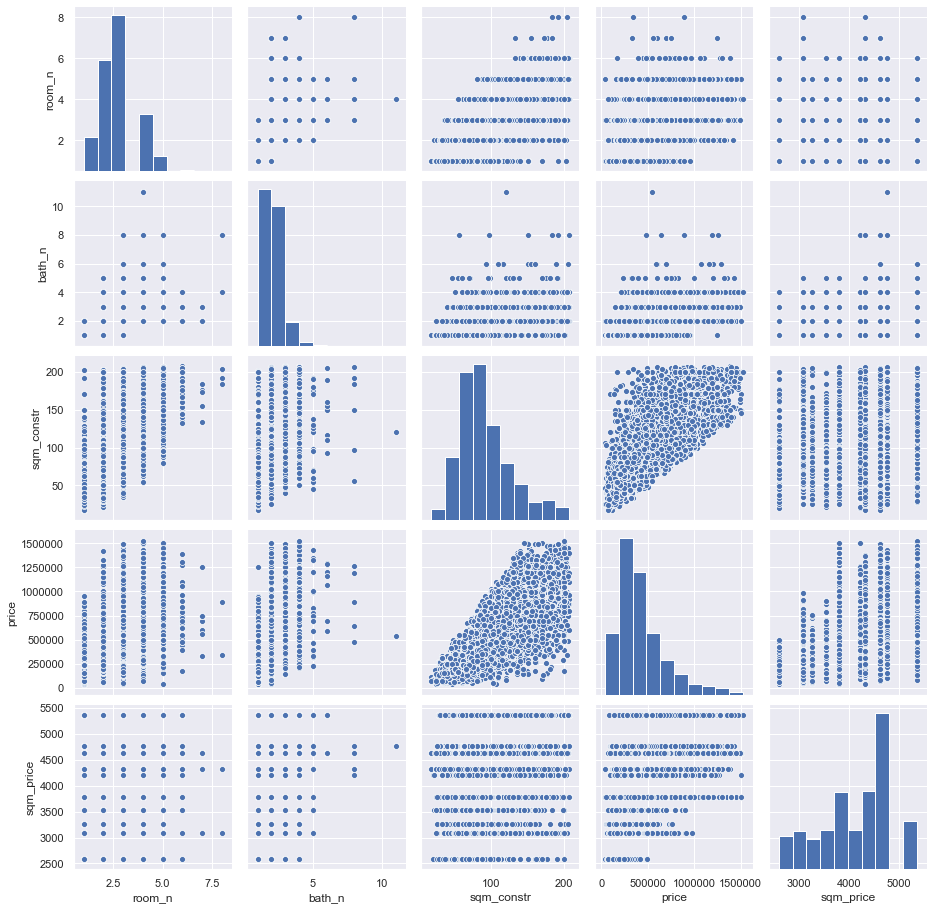

In [12]:
sns.set(style="darkgrid")
sns.pairplot(df_1)

the pairplot use two basic figures, the histogram and the scatterplot.
    -histogram: allow us to see the distribution of a single variable
    -Scatterplot: shows realtionships between two variables.

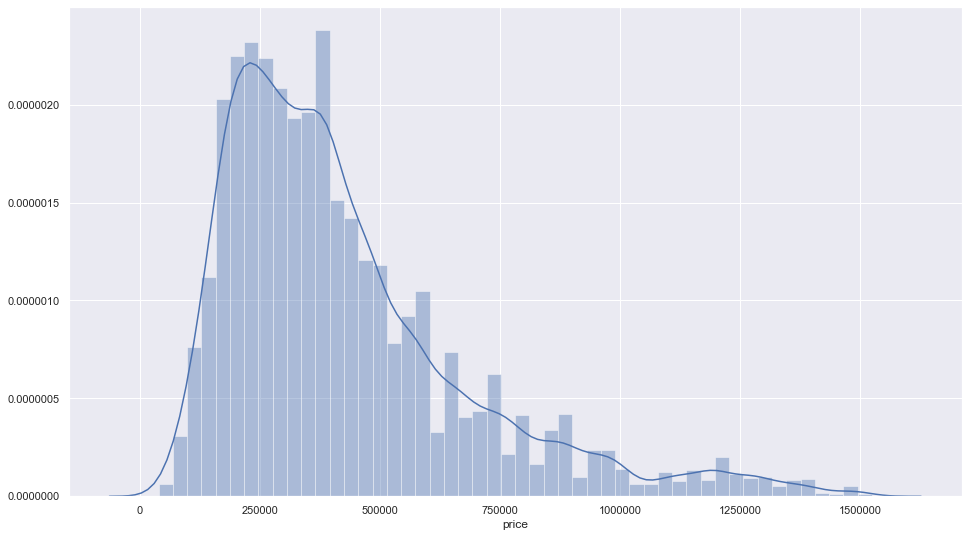

In [13]:
plt.figure(figsize=(16,9))
sns.distplot(df_1['price'])

### CORELATION

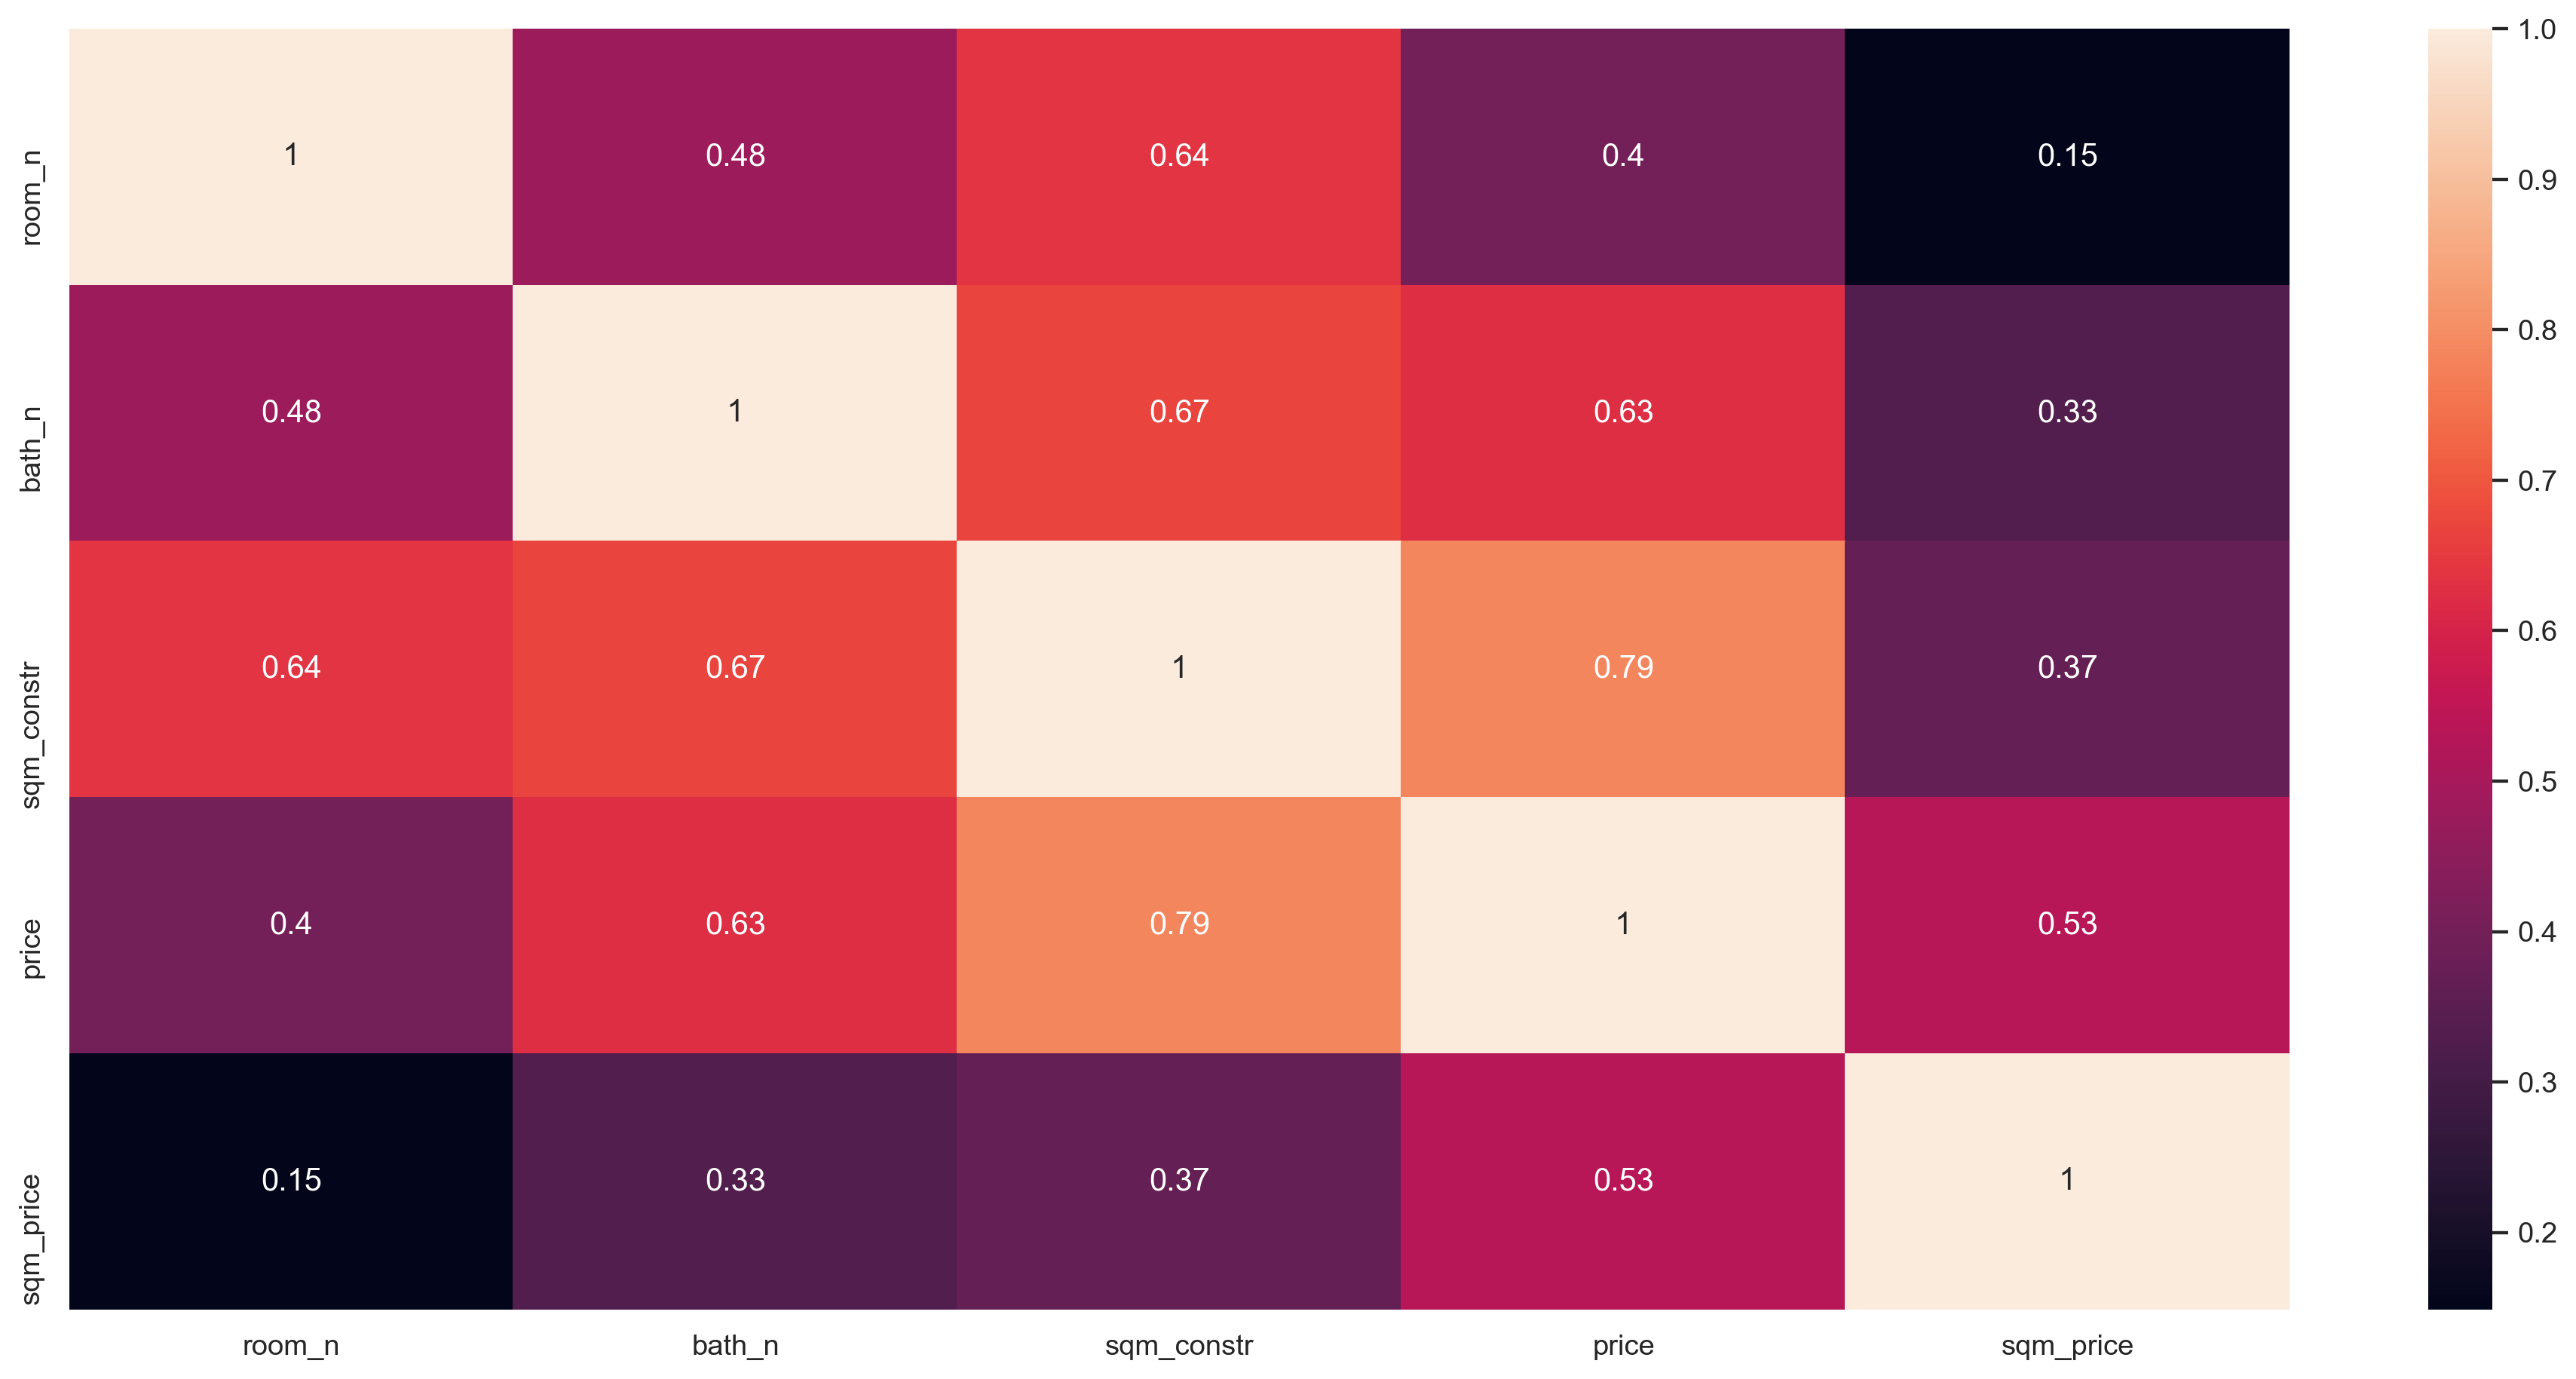

In [14]:
plt.figure(figsize=(19,9), dpi=250)
sns.heatmap(df_1.corr(), annot=True)

In [26]:
features = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'district', 'price'])
target   = df['price']

In [27]:
from yellowbrick.target import FeatureCorrelation

features_names = list(features.columns)

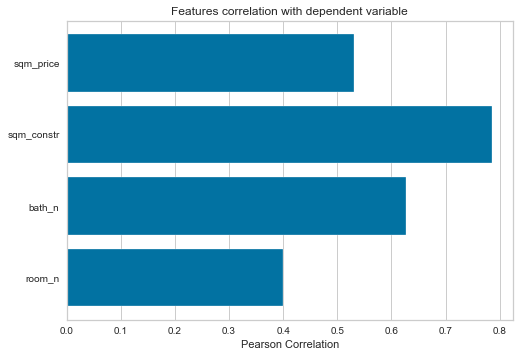

In [28]:
visualizer = FeatureCorrelation(labels = features_names)

visualizer.fit(features, target)

visualizer.poof()

___By a graphical methode, we probe witch one of our features was the less correlated with the dependent variable. this is a good practice, to remove non significant features.___

### Select K-Best features to predict price of houses

In [34]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

In [40]:
select_univariate = SelectKBest(f_regression, k=3).fit(features, target)

In [42]:
features_mask = select_univariate.get_support()

features_mask

array([False,  True,  True,  True])

In [43]:
selected_columns = features.columns[features_mask]

selected_columns

Index(['bath_n', 'sqm_constr', 'sqm_price'], dtype='object')

___In the same way, we can corroborate it using the sklear library.___

#### In this case we don't have a big number of fetarues so we decide to keep them all.

## Hot encoding for the district feature

In [46]:
dummies = pd.get_dummies(df.district)

In [47]:
dummies.head()

,Ciutat Vella,Eixample,Gràcia,Horta Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Marti,Sants Montjuic,Sarria-Sant_Gervasi
0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [48]:
df_2 = pd.concat([df_1,dummies],axis='columns')

In [49]:
df_2.head()

,room_n,bath_n,sqm_constr,price,sqm_price,Ciutat Vella,Eixample,Gràcia,Horta Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Marti,Sants Montjuic,Sarria-Sant_Gervasi
0,4.0,2.0,185.0,1350000.0,5362,0,0,0,0,0,0,0,0,0,1
1,2.0,2.0,86.0,645000.0,4632,0,1,0,0,0,0,0,0,0,0
2,3.0,1.0,70.0,399000.0,4632,0,1,0,0,0,0,0,0,0,0
3,4.0,2.0,100.0,398000.0,4632,0,1,0,0,0,0,0,0,0,0
4,3.0,2.0,140.0,690000.0,5362,0,0,0,0,0,0,0,0,0,1


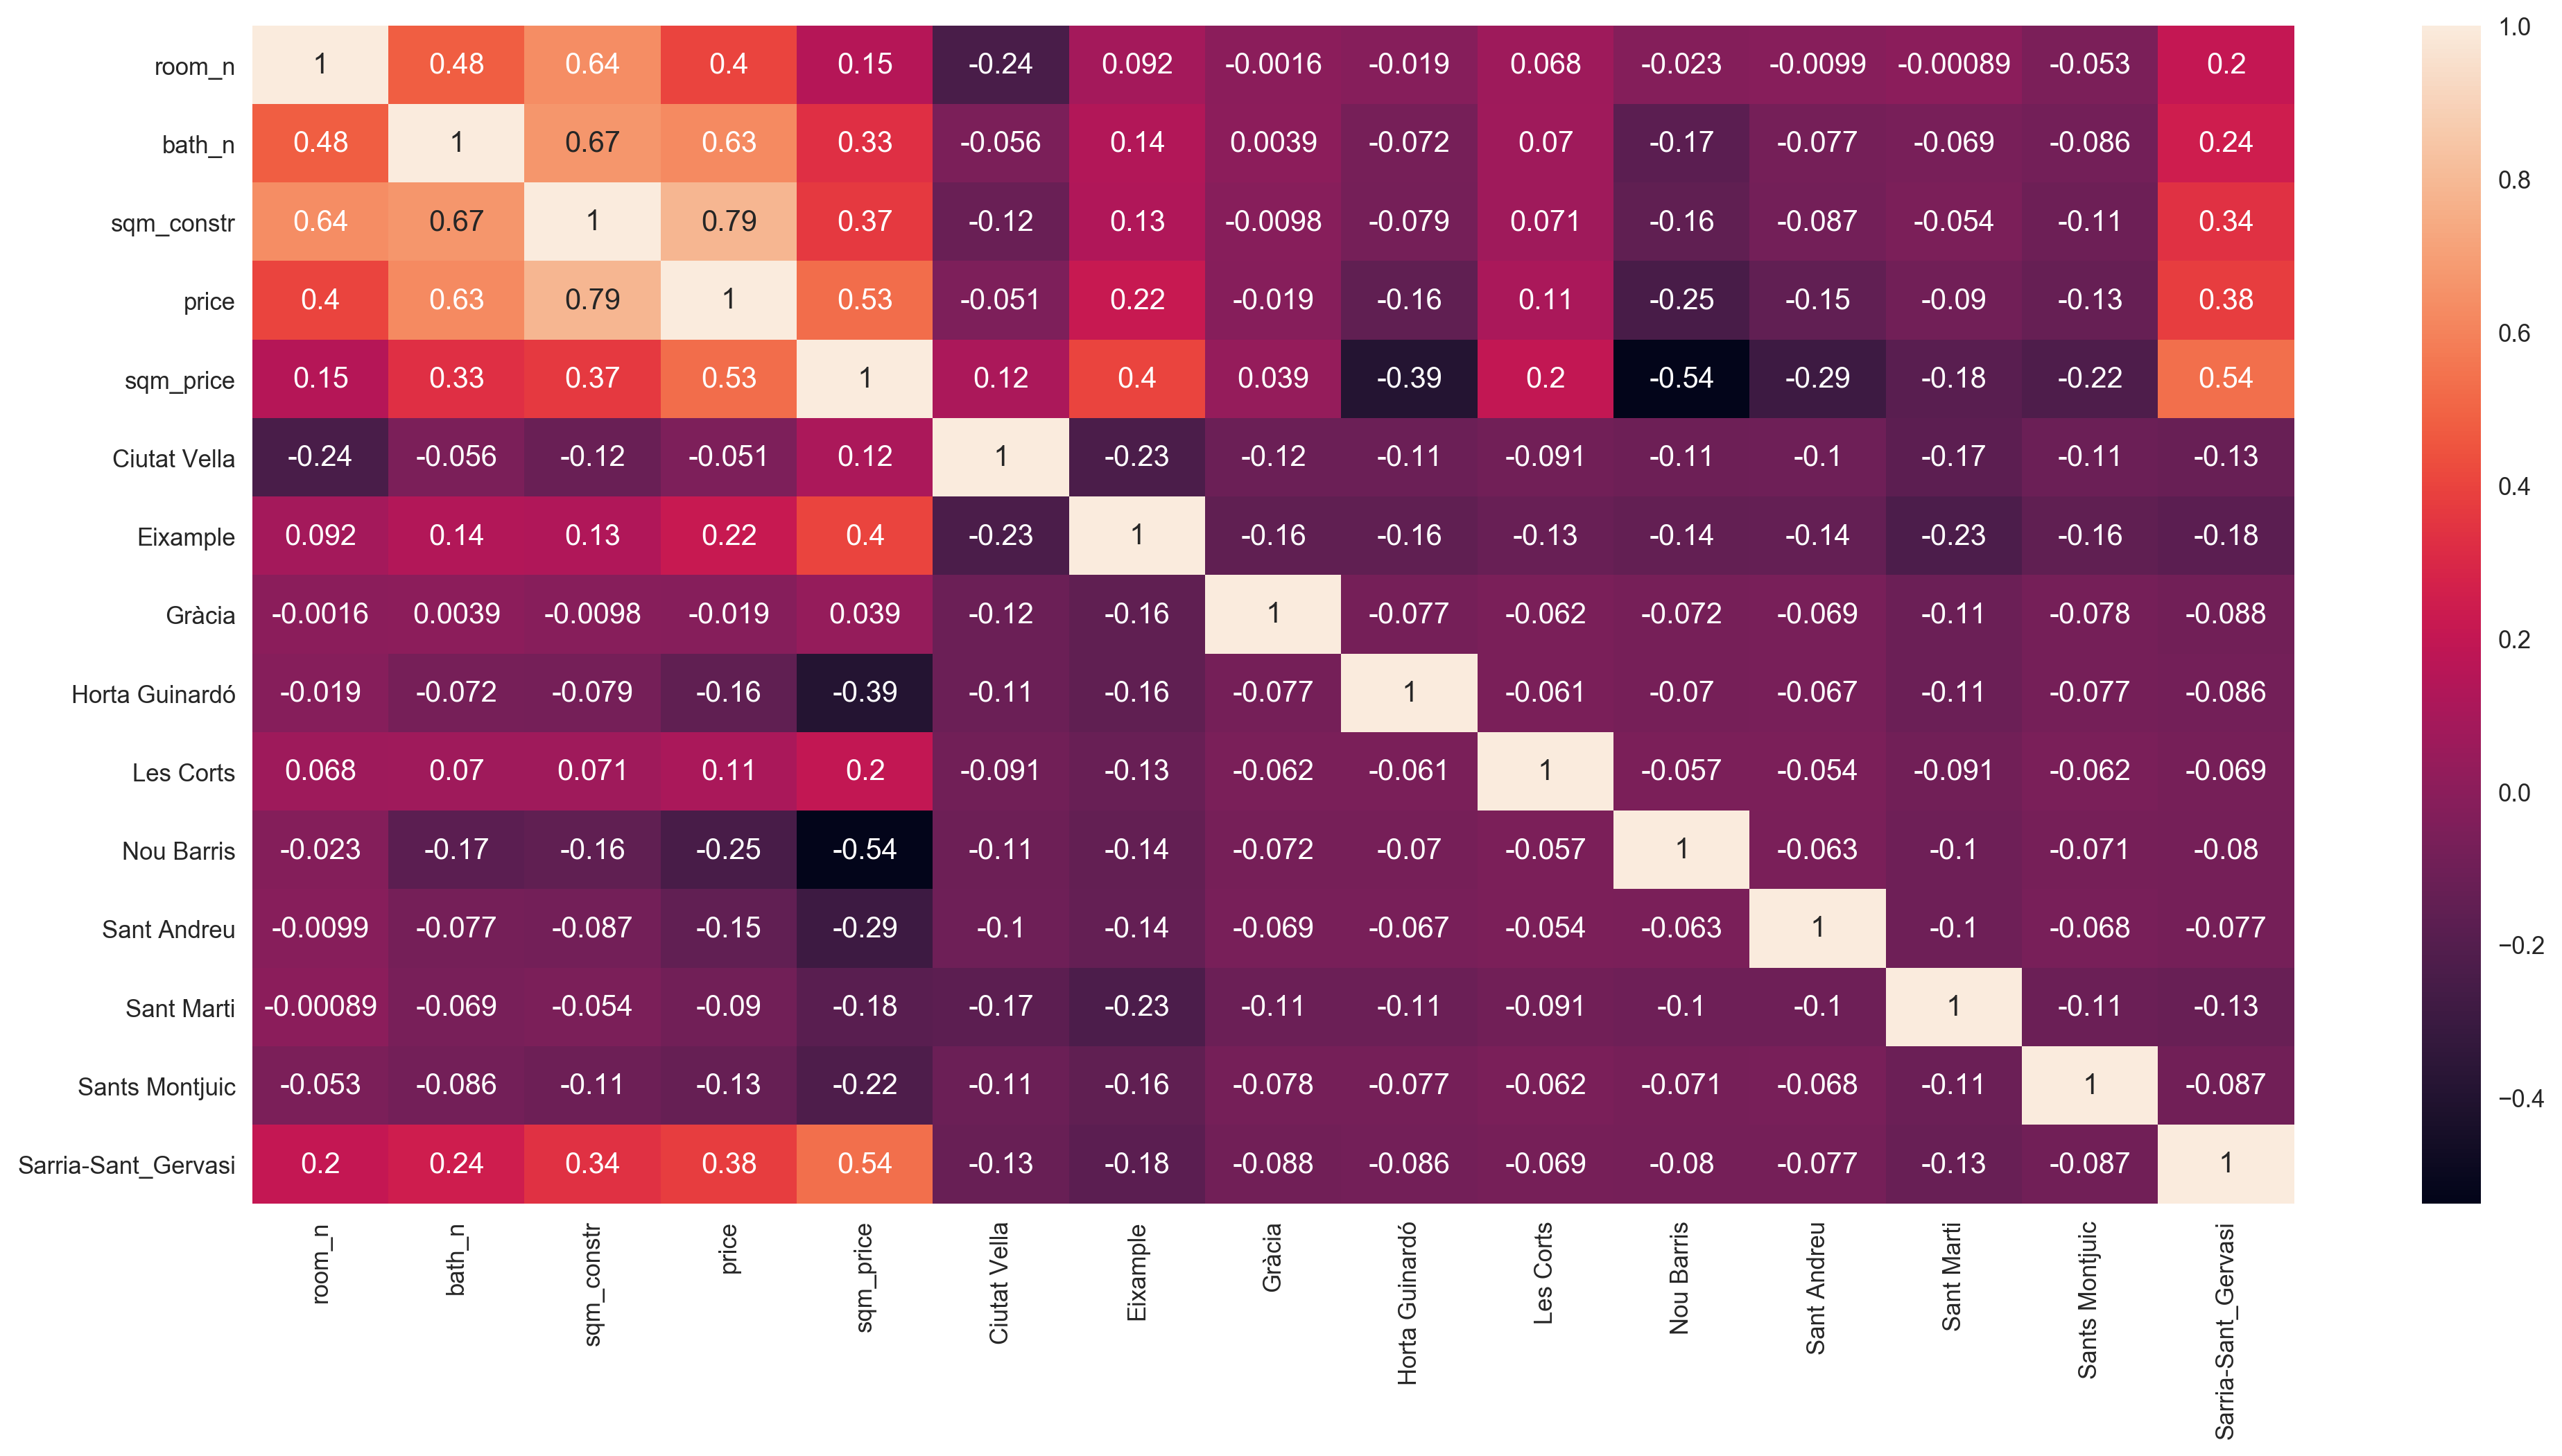

In [50]:
plt.figure(figsize=(19,9), dpi=250)
sns.heatmap(df_2.corr(), annot=True)

*To prepare the model, we will be using the features analysed combined with the hot enconding of district*

In [51]:
features = df_2.drop(columns='price')

## 2 Training a Linear Regression Model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor

### 2.1 Train Test Split 

Our goal is to create a model that generalises well to the new data. 
by dividing the data in train and test we we are abble to use the test sample to chech the accuracy of the model built by the train data.

first, we have to split up our data into X array that contains the features and y array with the target variable,the 'price' in this case. the categorical features have been replaced by a hot encoding that represents each one of the districts.

**it's common practice to standarize the data before fiting it to the machine learning model.**

In [53]:
from sklearn.preprocessing import scale

In [54]:
y = df_2['price']
X = pd.DataFrame(data=scale(features), columns=features.columns)

In [57]:
X.describe()

,room_n,bath_n,sqm_constr,sqm_price,Ciutat Vella,Eixample,Gràcia,Horta Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Marti,Sants Montjuic,Sarria-Sant_Gervasi
count,1.321000e+04,1.321000e+04,1.321000e+04,1.321000e+04,1.321000e+04,1.321000e+04,1.321000e+04,1.321000e+04,1.321000e+04,13210.000000,1.321000e+04,1.321000e+04,1.321000e+04,1.321000e+04
mean,1.420010e-16,5.163672e-17,1.463040e-16,3.184264e-16,-1.936377e-17,3.442448e-17,-6.992472e-17,-1.506071e-17,-5.163672e-17,0.000000,-5.378825e-19,4.948519e-17,1.237130e-17,6.884896e-17
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.790200e+00,-8.671274e-01,-2.040668e+00,-2.097954e+00,-4.115058e-01,-5.652862e-01,-2.810408e-01,-2.745589e-01,-2.215373e-01,-0.256422,-2.442997e-01,-4.089871e-01,-2.786818e-01,-3.136272e-01
25%,-7.786273e-01,-8.671274e-01,-7.207534e-01,-7.944047e-01,-4.115058e-01,-5.652862e-01,-2.810408e-01,-2.745589e-01,-2.215373e-01,-0.256422,-2.442997e-01,-4.089871e-01,-2.786818e-01,-3.136272e-01
50%,2.329449e-01,5.159628e-01,-1.982870e-01,2.795105e-01,-4.115058e-01,-5.652862e-01,-2.810408e-01,-2.745589e-01,-2.215373e-01,-0.256422,-2.442997e-01,-4.089871e-01,-2.786818e-01,-3.136272e-01
75%,2.329449e-01,5.159628e-01,4.891688e-01,7.085266e-01,-4.115058e-01,-5.652862e-01,-2.810408e-01,-2.745589e-01,-2.215373e-01,-0.256422,-2.442997e-01,-4.089871e-01,-2.786818e-01,-3.136272e-01
max,5.290806e+00,1.296377e+01,3.156497e+00,1.712314e+00,2.430100e+00,1.769015e+00,3.558203e+00,3.642205e+00,4.513912e+00,3.899819,4.093333e+00,2.445065e+00,3.588321e+00,3.188499e+00


In [55]:
X.isna().sum()

room_n                 0
bath_n                 0
sqm_constr             0
sqm_price              0
Ciutat Vella           0
Eixample               0
Gràcia                 0
Horta Guinardó         0
Les Corts              0
Nou Barris             0
Sant Andreu            0
Sant Marti             0
Sants Montjuic         0
Sarria-Sant_Gervasi    0
dtype: int64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [59]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regresion':{
            'model':LinearRegression(),
            'params':{
                'normalize': [True, False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha': [1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_ese'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

c:\program files\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1333320452756.125, tolerance: 72498686867.73894
  model = cd_fast.enet_coordinate_descent(
c:\program files\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 712999165691.0312, tolerance: 71629492135.8184
  model = cd_fast.enet_coordinate_descent(
c:\program files\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734589416978.125, tolerance: 71845036113.60872
  model = cd_fast.enet_coordinate_descent(
c:\program files\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarn

,model,best_score,best_params
0,linear_regresion,0.710253,{'normalize': False}
1,lasso,0.710279,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.722233,"{'criterion': 'mse', 'splitter': 'random'}"


### 2.2Linear Regression Model

In [60]:
clf = LinearRegression()

clf.fit(X_train,y_train)

#clf.score(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred = clf.predict(X_test)

#### The final step is to evaluate the performance of the algorithm.

        - compare y_test and y_pred

In [62]:
pd.options.display.float_format = '{:.2f}'.format
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_comp

,Actual,Predicted
2379,750000.00,895813.00
4518,325000.00,284357.00
7551,650000.00,628037.00
9129,505000.00,399941.00
5813,595000.00,504357.00
...,...,...
8896,245000.00,212773.00
6043,198000.00,206373.00
2440,790000.00,662085.00
7081,1000000.00,961221.00


In [65]:
df_comp_1 = df_comp.sample(20)


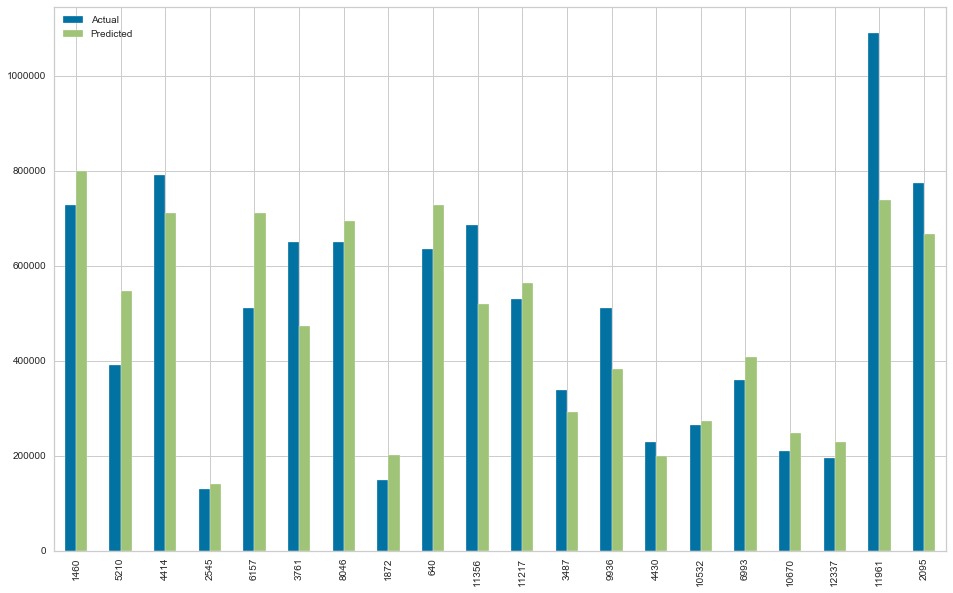

In [66]:
df_comp_1.plot(kind='bar',figsize=(16,10))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

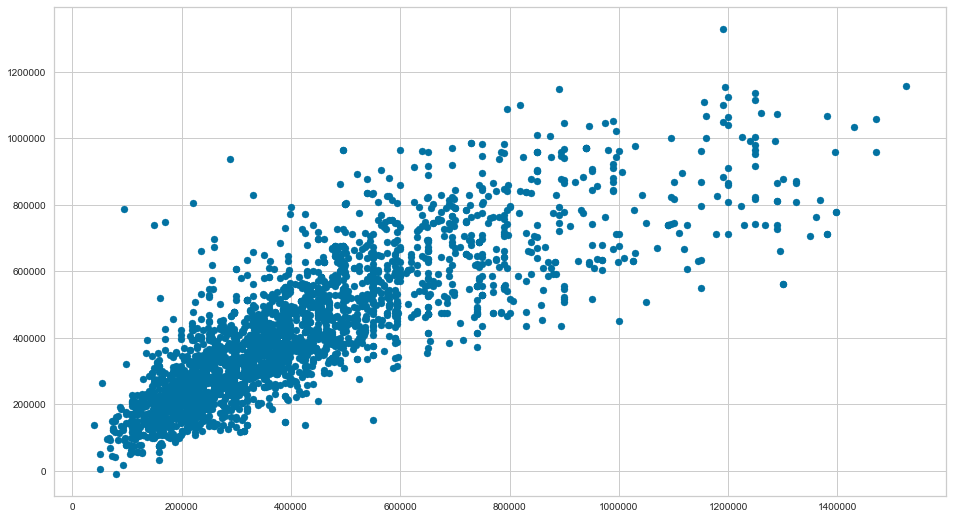

In [67]:
plt.figure(figsize=(16,9))
plt.scatter(y_test,y_pred)

    - Mean absolute Error (MAE): is the mean of the absolute value of the errors. 

<img src="png\funciones\mea.png">

    - Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

<img src="png\funciones\mse.png">

      - Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

<img src="png\funciones\rmse.png">

In [68]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 96983.6885657701
Mean Squared Error: 19252310131.82999
Root Mean Squared Error: 138752.69414260032


In [80]:
score = clf.score(X_train, y_train)
r2scor = r2_score(y_test, y_pred)

In [81]:
print(f"score: {score}")
print(f"R2 score: {r2scor}")

score: 0.7150221417191527
R2 score: 0.6891869825011201


-1–0.8 → Very strong
-0.799–0.6 → Strong
-0.599–0.4 → Moderate
-0.399–0.2 → Weak
-0.199–0 → Very Weak

### 2.3 Cross Validation Evaluation

Cross Validation is a technique for asseissing how the statistical analysis genralises to an independent data set. It is a technique for evaluationg machine learninf models by traning several models on subsets of the available input data and evaluationf them on the complementary subset of the data. Usianf cross-validatio, there are high chances taht we can detect over-fitting with ease

#### K-Fold Cross Validation
never mix train and test data.
the first step is alway to isolate the test data set and use it only for the final evaluation. CV will thus be performed on the traning set.

<img src="png\cross_val.png">

In [47]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X, y, cv=15))

[0.71812162 0.69187205 0.70637457 0.67553447 0.68254638 0.67273887
 0.73975141 0.71518494 0.73638369 0.7346225  0.72492529 0.66990169
 0.70885485 0.71722776 0.62894734]


### 2.4Multiple Linear Regression

<img src="png\mlr.png">

in the case of multivariable linear regression, the model has to find the most optimal coefficients for al the attributes. For that we can check what coefficients our regression model has chosen

In [83]:
coeff_df = pd.DataFrame(clf.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
room_n,-40730.37
bath_n,41699.24
sqm_constr,179096.35
sqm_price,58894652053370744.00
Ciutat Vella,576029069099194048.00
Eixample,690390890356493312.00
Gràcia,428518947362539712.00
Horta Guinardó,443546352906240128.00
Les Corts,338082311393721600.00
Nou Barris,427517827209490496.00


In [87]:
testing_df = pd.DataFrame([4,  2,  1, 120, 6000,
      1, 0, 0, 0,0,0, 0,0,0], index=features.columns).T
testing_df

,room_n,bath_n,sqm_constr,sqm_price,Ciutat Vella,Eixample,Gràcia,Horta Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Marti,Sants Montjuic,Sarria-Sant_Gervasi
0,4,2,1,120,6000,1,0,0,0,0,0,0,0,0


In [91]:
import statsmodels.api as sm

In [92]:
X_train_2 = sm.add_constant(X_train)

In [94]:
model = sm.OLS(y_train, X_train_2).fit()
y_pred = model.predict(X_train_2)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     2208.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:21:24   Log-Likelihood:            -1.4020e+05
No. Observations:               10568   AIC:                         2.804e+05
Df Residuals:                   10555   BIC:                         2.805e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.258e+05   1

In [95]:
clf.intercept_

425765.0011355034

In [96]:
clf.coef_

array([-4.07303653e+04,  4.16992362e+04,  1.79096349e+05,  5.88946521e+16,
        5.76029069e+17,  6.90390890e+17,  4.28518947e+17,  4.43546353e+17,
        3.38082311e+17,  4.27517827e+17,  3.97131006e+17,  5.88527302e+17,
        4.39641518e+17,  4.43291519e+17])

import statsmodels.api as sm

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
max_depth = [2, 4, 6, 8, 10]
score_train = []
score_test  = []
for i in max_depth:
    regr = RandomForestRegressor(max_depth=i)
    result = regr.fit(X_train, y_train)
    y_pred_train = result.predict(X_train)
    y_pred_test = result.predict(X_test)
    r2_score_training = r2_score(y_train, y_pred_train)
    r2_score_test = r2_score(y_test, y_pred_test)
    print(f'rand_forest {i} training score = {r2_score_training} Vs. test score = {r2_score_test}')
    score_train.append(r2_score_training)
    score_test.append(r2_score_test)

rand_forest 2 training score = 0.6056849129924695 Vs. test score = 0.5541445121722388
rand_forest 4 training score = 0.709873873204679 Vs. test score = 0.6638335883108111
rand_forest 6 training score = 0.7609292051355669 Vs. test score = 0.7205008215201132
rand_forest 8 training score = 0.8024582579532991 Vs. test score = 0.7471567056739346
rand_forest 10 training score = 0.842166732700393 Vs. test score = 0.7633871617598202


Text(0, 0.5, 'r2 score')

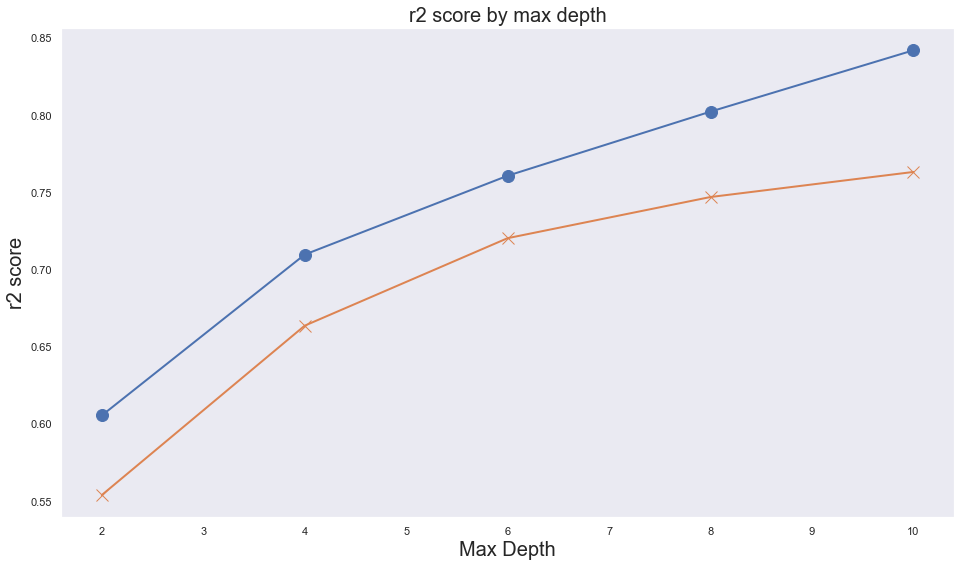

In [52]:
plt.figure(figsize=(16,9))
plt.grid()
plt.title('r2 score by max depth', size=20)
plt.plot(max_depth, score_train, label='score train', marker='o', linewidth=2, markersize=12)
plt.plot(max_depth, score_test, label='score test',marker='x', linewidth=2, markersize=12)
plt.xlabel('Max Depth', size=20)
plt.ylabel('r2 score', size=20)

##  3HOUSE PREDICTOR WITH DEEP LEARNING

    -this model has the objective of predict if a house will be above the median price or not based off of its features using deep learning

### 3.1 IMPORT LIBRARIES

In [57]:
from keras.models import Sequential
#from keras.layers import Dense
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMAxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "c:\program files\python38\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\program files\python38\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\program files\python38\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "c:\program files\python38\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "c:\program files\python38\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: No se puede encontrar el módulo especificado.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.